<a href="https://colab.research.google.com/github/Manjunathmr0307/Zeotap/blob/main/Manjunath_MR_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
customers=pd.read_csv('/Customers.csv')

In [18]:
print(customers)

    CustomerID        CustomerName         Region  SignupDate
0        C0001    Lawrence Carroll  South America  2022-07-10
1        C0002      Elizabeth Lutz           Asia  2022-02-13
2        C0003      Michael Rivera  South America  2024-03-07
3        C0004  Kathleen Rodriguez  South America  2022-10-09
4        C0005         Laura Weber           Asia  2022-08-15
..         ...                 ...            ...         ...
195      C0196         Laura Watts         Europe  2022-06-07
196      C0197    Christina Harvey         Europe  2023-03-21
197      C0198         Rebecca Ray         Europe  2022-02-27
198      C0199      Andrea Jenkins         Europe  2022-12-03
199      C0200         Kelly Cross           Asia  2023-06-11

[200 rows x 4 columns]


In [19]:
products=pd.read_csv('/Products.csv')

In [20]:
print(products)

   ProductID              ProductName     Category   Price
0       P001     ActiveWear Biography        Books  169.30
1       P002    ActiveWear Smartwatch  Electronics  346.30
2       P003  ComfortLiving Biography        Books   44.12
3       P004            BookWorld Rug   Home Decor   95.69
4       P005          TechPro T-Shirt     Clothing  429.31
..       ...                      ...          ...     ...
95      P096     SoundWave Headphones  Electronics  307.47
96      P097       BookWorld Cookbook        Books  319.34
97      P098         SoundWave Laptop  Electronics  299.93
98      P099   SoundWave Mystery Book        Books  354.29
99      P100        HomeSense Sweater     Clothing  126.34

[100 rows x 4 columns]


In [21]:
transactions=pd.read_csv('/Transactions.csv')
print(transactions)

    TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0          T00001      C0199      P067  2024-08-25 12:38:23         1   
1          T00112      C0146      P067  2024-05-27 22:23:54         1   
2          T00166      C0127      P067  2024-04-25 07:38:55         1   
3          T00272      C0087      P067  2024-03-26 22:55:37         2   
4          T00363      C0070      P067  2024-03-21 15:10:10         3   
..            ...        ...       ...                  ...       ...   
995        T00496      C0118      P037  2024-10-24 08:30:27         1   
996        T00759      C0059      P037  2024-06-04 02:15:24         3   
997        T00922      C0018      P037  2024-04-05 13:05:32         4   
998        T00959      C0115      P037  2024-09-29 10:16:02         2   
999        T00992      C0024      P037  2024-04-21 10:52:24         1   

     TotalValue   Price  
0        300.68  300.68  
1        300.68  300.68  
2        300.68  300.68  
3        601.36  30

In [22]:
customers['SignupDate']=pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate']=pd.to_datetime(transactions['TransactionDate'])
customers['CustomerID']=customers['CustomerID'].str.strip()
products['ProductID']=products['ProductID'].str.strip()
transactions['CustomerID']=transactions['CustomerID'].str.strip()
transactions['ProductID']=transactions['ProductID'].str.strip()

In [23]:
top_products=transactions.groupby('ProductID')['Quantity'].sum().nlargest(5).reset_index()
top_products=top_products.merge(products, on='ProductID')
print("Top 5 Most Purchased Products:\n", top_products)

Top 5 Most Purchased Products:
   ProductID  Quantity            ProductName     Category   Price
0      P054        46     SoundWave Cookbook        Books   57.30
1      P059        46        SoundWave Jeans     Clothing  303.20
2      P029        45     TechPro Headphones  Electronics  433.64
3      P048        43       TechPro Cookbook        Books  416.40
4      P057        43  ActiveWear Smartphone  Electronics  239.70


In [24]:
region_revenue = transactions.merge(customers, on='CustomerID').groupby('Region')['TotalValue'].sum().reset_index()
print("Revenue by Region:\n", region_revenue)

Revenue by Region:
           Region  TotalValue
0           Asia   152074.97
1         Europe   166254.63
2  North America   152313.40
3  South America   219352.56


In [25]:
signup_trends=customers['SignupDate'].dt.year.value_counts().sort_index()
print("Customer Signup Trends:\n", signup_trends)

Customer Signup Trends:
 SignupDate
2022    64
2023    57
2024    79
Name: count, dtype: int64


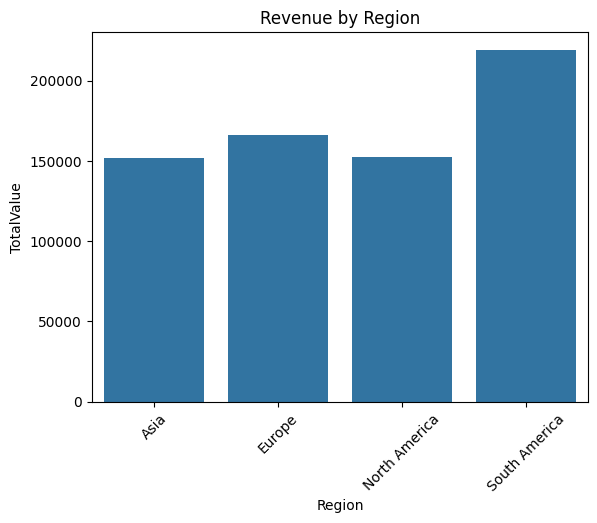

In [26]:
sns.barplot(x='Region', y='TotalValue', data=region_revenue)
plt.title("Revenue by Region")
plt.xticks(rotation=45)
plt.show()